In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def build_empirical_utility(S, responses):
    if not responses:
        raise ValueError("")
    x_vals = [S]
    u_vals = [1.0]
    for p, x in responses:
        if not (0 < p < 1):
            raise ValueError(f"p={p}")
        if x <= 0 or x >= x_vals[-1]:
            raise ValueError(f"x={x}")

        u_new = (1.0 - p) * u_vals[-1]
        x_vals.append(x)
        u_vals.append(u_new)

    x_vals.append(0.0)
    u_vals.append(0.0)

    sorted_pairs = sorted(zip(x_vals, u_vals), key=lambda pair: pair[0])
    x_sorted, u_sorted = zip(*sorted_pairs)

    return np.array(x_sorted), np.array(u_sorted)


def plot_utility(x_vals: np.ndarray, u_vals: np.ndarray, S: float) -> None:
    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, u_vals, 'bo-', label='Эмпирическая $u(x)$')
    plt.xlabel('Выигрышь $x$')
    plt.ylabel('Полезность $u(x)$')
    plt.title('Эмпирическая функция полезности')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(0, S)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

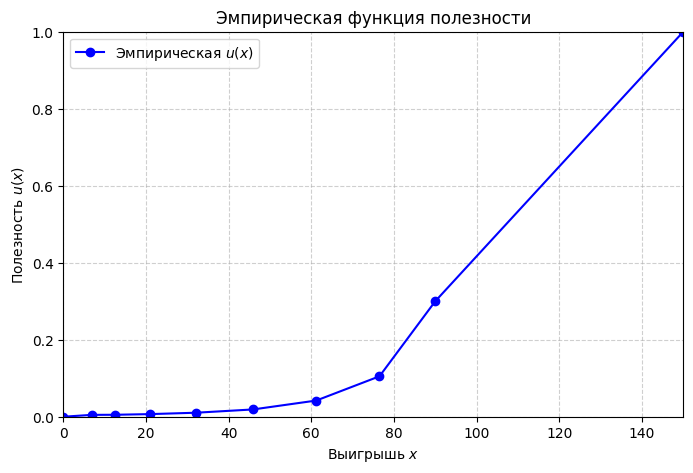

Эмпирическая функция полезности:
x		u(x)
0.00		0.0000
6.90		0.0048
12.50		0.0051
20.90		0.0068
32.10		0.0104
45.90		0.0189
61.20		0.0420
76.50		0.1050
90.00		0.3000
150.00		1.0000


In [ ]:

S = 150.0

# (p1, x1)
responses = [
    (0.7, 90.0),   
    (0.65, 76.5),   
    (0.60, 61.2),   
    (0.55, 45.9),   
    (0.45, 32.1),   
    (0.35, 20.9),   
    (0.25, 12.5),   
    (0.05, 6.9)   
]

x_emp, u_emp = build_empirical_utility(S=S, responses=responses)
plot_utility(x_emp, u_emp, S)

print("Эмпирическая функция полезности:")
print("x\t\tu(x)")
for x, u in zip(x_emp, u_emp):
    print(f"{x:.2f}\t\t{u:.4f}")